# Partitions around medoids (PAM)

Robust alternative to K-Means.
More robust against outliers.

**Instalation**

> conda install -c conda-forge scikit-learn-extra

In [1]:
# — — — — — — -Importing Packages — — — — — — — — — — — -
import matplotlib.pyplot as plt
import numpy as np
from sklearn_extra.cluster import KMedoids

In [2]:
# — — — — — — -Assigning Initial Centers — — — — — — — — — — — -
centers = [[4, 5], [9, 10]]

# — — — — — — -Assigning Data: Dummy Data used in example above — — — — — — — — — — — — — — — — — — 
df=np.array([[7,8], [9,10], [11,5], [4,9], [7,5], [2,3], [4,5]])

# — — — — — — -Fit KMedoids clustering — — — — — — — — — — — -
KMobj = KMedoids(n_clusters=2).fit(df)

# — — — — — — -Assigning Cluster Labels — — — — — — — — — — — -
labels = KMobj.labels_
labels

array([0, 0, 1, 0, 1, 1, 1], dtype=int64)

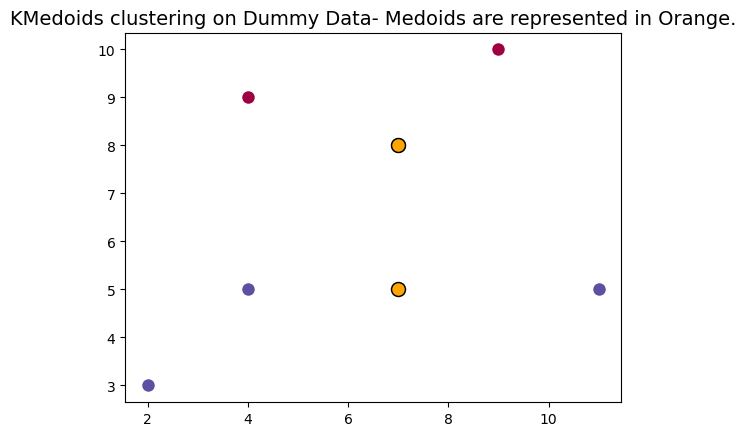

In [3]:
# — — — — — — -Extracting Unique Labels — — — — — — — — — — — -
unq_lab = set(labels)

# — — — — — — -Setting Up Color Codes — — — — — — — — — — — -
colors_plot = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unq_lab))]

for k, col in zip(unq_lab, colors_plot): 
    class_member_mask = labels == k
 
    # — — — — — — -Setting datapoint Feature X and Feature Y — — — — — — — — — — — -
    xy = df[class_member_mask]
 
    # — — — — — — -Plotting Feature X and Feature Y for each cluster labels — — — — — — — — — — — -
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='white', markersize=10)

    # — — — — — — -Annotate Centroids — — — — — — — — — — — -
    plt.plot(KMobj.cluster_centers_[:, 0], KMobj.cluster_centers_[:, 1], 'o', 
             markerfacecolor='orange', markeredgecolor='k', markersize=10)
    
# — — — — — — -Add title to the plot — — — — — — — — — — — -
plt.title('KMedoids clustering on Dummy Data- Medoids are represented in Orange.', fontsize=14);

----------------------

## Other clustering methods:

- **K-means**: very sensitive to outliers. Scales well on large numbers of samples. Minimize the WGSS (Withing Group Sum of Squares: Sum of the distances in the cluster means); lower WGSS, betther clusters.
    - Data needs to be normalized to keep same averages and dispersions across the data, which is an important concept of both **PCA** and **K-means**, as they are distance-based algorithms.
    > Data visualization techniques to find the proper K:
    > - PCA or t-SNE
    > - elbow plots: Polt of the WGSS against the number of clusters.
    
    - Good at finding spherical and ellipsoidal shaped clusters, not good finding shapes inside the shape of another cluster.
    
    - Drawbacks:
        * Random selection of the initial starting points gives different results.
        * Hard clustering, each item just one cluster (No probabilities at all). Sometimes it is prefered a softer clustering approach (probabilities).
        * Sensitive to outliers.

- **PAM or K-Medoids** (Partitioning around medoids (PAM): more robust against outliers. Use mediods (medians or actual observations from the data) as cluster center, instead of mean. Provides a useful representative object (medoid) for each cluster that helps in interpreting the final clusters.

- **Gaussian Mixture Models (GMM)**: cluster probability. An item can be part of multiple clusters.
    - Good at finding spherical and ellipsoidal shaped clusters, not good finding shapes inside the shape of another cluster.
    - Drawbacks:
        * Due to the probabilistic approach is more computationally heavy than k-means
        
- **Hierarchical clustering**: Solve clustering for all possible items at once. Choose desired number of cluster later.
    - **Agglomerative clustering**: start building up from individual observations.
    - **Divisive clustering**: start with whole group and split off clusters.
    >  **Distances between clusters methods**
    >  - **single linkage** --> minimum distance. Good at identifying long elongated clusters.
    >  - **complete linkage** --> maximum distance. Good at identifying small and badly separated clusters.
    >  - **average linkage** --> average distance. Good at identifying large well separated clusters.
    
    - Useful tools to select number of cluster: Dendrogram.
    - Pros:
        * Shows all possible linkages.
        * More understandable due to visual presentation (Dendogram).
        * No need to set the number of cluster at the beginning.
    - Drawbacks:
        * Hard to interpret when the number of data points is very high. Higher the observation count the more complex it is to interpret the dendrogram.

- **DBSCAN** (minPts, eps: radius): Generalization of sinlge linkage hierarchical clustering.
    - Pros:
        - Handle outliers by itself.

### How does the similarity between two data points is calculated?

Using distance metrics:
- **Euclidean Distance**: shortest possible distance between 2 points in vector space (feature space).
- **Manhattan Distance**: absolutte differences between 2 points across all dimensions.
- **Maximum Distance**: distance along all dimensions between 2 points and then picks the maximum one.

### How to measure the quality of the generated clusters

- Using Silhoutte Plot: Plot of the silhoutte distance. 
    - Score ranges from -1 to 1. 1 means well appart, 0 means indifferent, -1 means assigned in the wrong way.
    - 0.5 is used as a cut-off.
    - Larger than 0.5 --> well clustered. Small silhoutte distances: wrong cluster.


### Clustering in networks: Community Detection

- Methods to calculate distance between the nodes:
    - **Geodesic Distance**: shortest distance between two nodes in terms of the connections between them.
    - **Number of different neighbors**.
    - **Correlation between adjancency matrix columns**.
    
- Measures that help intuitions with clustering:
    - **Betweemess centrality**: edges which more paths go through. In a network, if these edges are removed, the remaining nodes will form the requisite clusters.
    - **Modularity maximization**: score of how many connections within a cmmunity but only a few pointing to other communities.
    
- The community detection can be performed using:
    - **Algorithm of Girvan and Newman** similar to *divisive hierarchicla clustering* (start with whole group and split off clusters). Remove the edges of the highest centrality. This method is very useful but slow in practice. 
    - **The Louvain Method**: similar to *agglomerative hierarchical clustering* (start building up from individual observations). Use modularity as a measure of similarity.

----------------------